# Ordovician Gondwana paleogeography reconstructions and pole plots

## Load functions and files

In [1]:
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
import os
%matplotlib inline

### `pygplates` import

In [2]:
import sys
# Replace this with the path to your package
package_path = '/Applications/pygplates_0.36.0_py39_Darwin-x86_64'

# Append the directory to sys.path
if package_path not in sys.path:
    sys.path.append(package_path)
import pygplates

## Data file import

In [3]:
ceed_land_path = '../data/paleogeography/blocks/CEED6_LAND.shp'
ceed_poly_path = '../data/paleogeography/blocks/CEED6_POLY.shp'
rot_path = '../data/paleogeography/models/Torsvik_Cocks_HybridRotationFile.rot'

ceed_modified_land_path = '../data/paleogeography/blocks/CEED6-modified.shp'
modified_rot_path = '../data/paleogeography/models/TC2017-SHM2017-D2018-extended.rot'
modified_rot_path_ice_centroid = '../data/paleogeography/models/TC2017-SHM2017-D2018-extended_ice_centroid.rot'

## Make folder for temporary reconstruction output

The code requires generating reconstructions of shapefiles that are then read in as geopandas dataframe. This code checks for such a folder and makes it if it isn't already there.

In [4]:
output_folder = 'temp_reconstructions'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Folder '{output_folder}' created.")
else:
    print(f"Folder '{output_folder}' already exists.")

Folder 'temp_reconstructions' already exists.


## Define a function for making map axes

In [5]:
def make_map(projection, central_longitude=0, central_latitude=0, figsize=(6, 6),
             grid_lines=True,
             lat_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,
                       0.,   30.,   60., 90.,  120.,  150.,  180.],
             lon_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,    0.,   30.,   60., 90.,  120.,  150.,  180.],
             label_latitudes=False):

    fig = plt.figure(figsize=figsize)
    
    # Try to create the projection with both central_longitude and central_latitude
    try:
        map_projection = projection(central_longitude=central_longitude, central_latitude=central_latitude)
    except TypeError:
        # If that fails, try again with only central_longitude
        map_projection = projection(central_longitude=central_longitude)
    
    ax = plt.axes(projection=map_projection)
    ax.set_global()
    if grid_lines == True:
        ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=1,
                     color='black', linestyle='dotted')
    return ax, map_projection

## Make CEED6 reconstruction

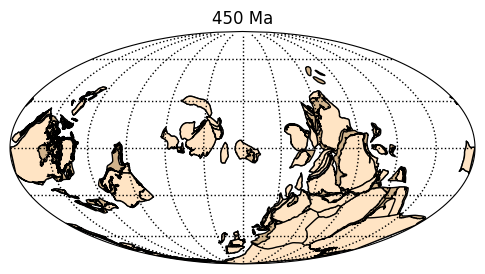

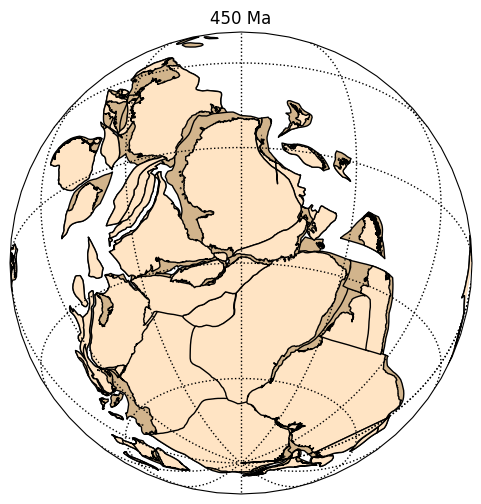

In [6]:
map_axis, proj_plot = make_map(ccrs.Mollweide)

t = 450

ceed_land_reconstruction = output_folder + '/land.shp'
pygplates.reconstruct(ceed_land_path, rot_path, ceed_land_reconstruction, t, 1)
paleogeo_land = gpd.read_file(ceed_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

ceed_poly_reconstruction = output_folder + '/poly.shp'
pygplates.reconstruct(ceed_poly_path, rot_path, ceed_poly_reconstruction, t, 1)
paleogeo_poly = gpd.read_file(ceed_poly_reconstruction)
paleogeo_poly = paleogeo_poly.to_crs(proj_plot)

paleogeo_poly.plot(ax=map_axis, edgecolor='k', linewidth=1, facecolor='tan')
paleogeo_land.plot(ax=map_axis, edgecolor='k', linewidth=1, facecolor='bisque')

map_axis.set_title(f'{t} Ma')
plt.show()

map_axis, proj_plot = make_map(ccrs.Orthographic, central_longitude=90, central_latitude=-30)

t = 450

ceed_land_reconstruction = output_folder + '/land.shp'
pygplates.reconstruct(ceed_land_path, rot_path, ceed_land_reconstruction, t, 1)
paleogeo_land = gpd.read_file(ceed_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

ceed_poly_reconstruction = output_folder + '/poly.shp'
pygplates.reconstruct(ceed_poly_path, rot_path, ceed_poly_reconstruction, t, 1)
paleogeo_poly = gpd.read_file(ceed_poly_reconstruction)
paleogeo_poly = paleogeo_poly.to_crs(proj_plot)

paleogeo_poly.plot(ax=map_axis, edgecolor='k', linewidth=1, facecolor='tan')
paleogeo_land.plot(ax=map_axis, edgecolor='k', linewidth=1, facecolor='bisque')

map_axis.set_title(f'{t} Ma')
plt.show()

## Plot poles and pole paths

### Import poles and pole paths

In [7]:
Torsvik_poles = pd.read_csv('../data/paleogeography/poles/Torsvik2012a.csv')
Torsvik_Gondwana_APWP = pd.read_csv('../data/paleogeography/poles/Torsvik2012a-Table7.csv')

rotated_blocks = ['Amazonia (S America, 201)', 'Parana (S America, 202)', 'Colorado (S America, 290)', 
          'Patagonia (S America, 291)', 'Meseta (707)', 'Somalia (709)', 
          'Northwest Africa (714)', 'Northeast Africa (715)', 'India–Pakistan (501)', 
          'Arabia (503)', 'Madagascar (702)', 'Australia (801)', 'East Antarctica (802)']

SA_block = ['Southern Africa (701)']

age_range_max = 500
age_range_min = 400

Torsvik_Gondwana_rotated_poles = Torsvik_poles[(Torsvik_poles['Block'].isin(rotated_blocks)) & (Torsvik_poles['Age']>age_range_min) & (Torsvik_poles['Age']<age_range_max)]
Torsvik_SouthAfrica_poles = Torsvik_poles[(Torsvik_poles['Block'].isin(SA_block)) & (Torsvik_poles['Age']>age_range_min) & (Torsvik_poles['Age']<age_range_max)]

Torsvik_Gondwana_rotated_poles.sort_values(by=['Age'], inplace=True)
Torsvik_SouthAfrica_poles.sort_values(by=['Age'], inplace=True)

Torsvik_Gondwana_rotated_poles.reset_index(inplace=True)
Torsvik_SouthAfrica_poles.reset_index(inplace=True)

Torsvik_Gondwana_APWP = Torsvik_Gondwana_APWP[(Torsvik_Gondwana_APWP['age'] < age_range_max) & (Torsvik_Gondwana_APWP['age'] > age_range_min)]
Torsvik_Gondwana_rotated_poles = Torsvik_Gondwana_rotated_poles[(Torsvik_Gondwana_rotated_poles['Age'] > age_range_min) & (Torsvik_Gondwana_rotated_poles['Age'] < age_range_max)]
Torsvik_SouthAfrica_poles = Torsvik_SouthAfrica_poles[(Torsvik_SouthAfrica_poles['Age'] > age_range_min) & (Torsvik_SouthAfrica_poles['Age'] < age_range_max)]

# Develop dataframe just with running mean
Torsvik_Gondwana_RM = Torsvik_Gondwana_APWP[['age', 'N', 'RM_a95', 'RM_plat', 'RM_plon', 'RM_0.6_a95', 'RM_0.6_plat',
    'RM_0.6_plon']]
# Drop rows where 'RM_a95' is NaN
Torsvik_Gondwana_RM_filtered = Torsvik_Gondwana_RM.dropna(subset=['RM_a95'])
Torsvik_Gondwana_RM_filtered = Torsvik_Gondwana_RM_filtered[(Torsvik_Gondwana_RM_filtered['age'] > age_range_min) & (Torsvik_Gondwana_RM_filtered['age'] < age_range_max)]

In [8]:
Gondwana_blocks = ['Amazonia (S America, 201)', 'Parana (S America, 202)', 'Colorado (S America, 290)', 
          'Patagonia (S America, 291)', 'Meseta (707)', 'Somalia (709)', 
          'Northwest Africa (714)', 'Northeast Africa (715)', 'India–Pakistan (501)', 
          'Arabia (503)', 'Madagascar (702)', 'Australia (801)', 'East Antarctica (802)', 'Southern Africa (701)']

Paleozoic_Gondwana_poles = Torsvik_poles[(Torsvik_poles['Block'].isin(Gondwana_blocks)) & (Torsvik_poles['Age']>252) & (Torsvik_poles['Age']<539)]
Paleozoic_Gondwana_poles.sort_values(by=['Age'], inplace=True)

In [9]:
Paleozoic_Gondwana_poles.sort_values(by=['a95'], inplace=True)
Paleozoic_Gondwana_poles.tail(3)

,Q,a95,Com,Formation,Lat,Lon,CLat,CLon,RLat,RLon,EULER,Age,GPDB RefNo/Reference,Block
437,5,18.0,NaN,"Pakhuis, Cedarberg Formations, Cape Province, ...",25.0,343.0,17.0,-11.0,NaN,NaN,NaN,446.5,"1416, TV",Southern Africa (701)
393,3,18.1,NaN,"Sierra de las Animas volcanic Complex, Uruguay",5.9,338.1,NaN,NaN,24.1,12.1,(47.6/− 33.3/56.2),510.0,3513,"Parana (S America, 202)"
448,3,20.9,NaN,"Volcanics, Mechra ben Abou and Chougrane, Morocco",-36.0,58.0,NaN,NaN,-34.9,60.5,(33.6/26/2.3),280.5,"1859, T",Meseta (707)


### Plot Torsvik et al. (2012) pole compilation

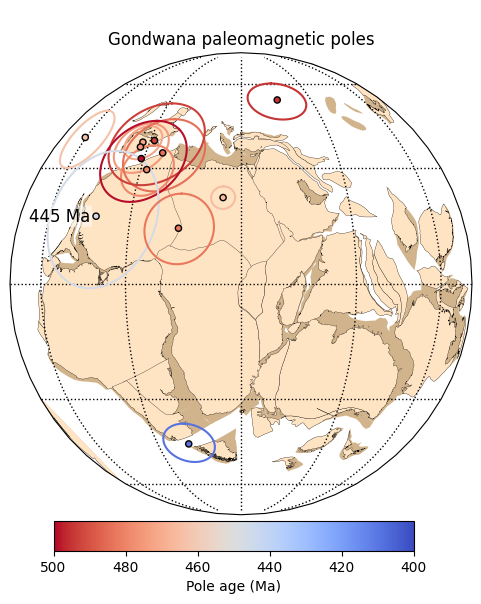

In [10]:
plons = Torsvik_Gondwana_rotated_poles['RLon'].tolist() + Torsvik_SouthAfrica_poles['CLon'].tolist()
plats = Torsvik_Gondwana_rotated_poles['RLat'].tolist() + Torsvik_SouthAfrica_poles['CLat'].tolist()
A95s = Torsvik_Gondwana_rotated_poles['a95'].tolist() + Torsvik_SouthAfrica_poles['a95'].tolist()
ages = Torsvik_Gondwana_rotated_poles['Age'].tolist() + Torsvik_SouthAfrica_poles['Age'].tolist()

map_axis, proj_plot = make_map(ccrs.Orthographic, central_longitude=30, central_latitude=0)

t = 450

ceed_land_reconstruction = output_folder + '/land.shp'
pygplates.reconstruct(ceed_land_path, rot_path, ceed_land_reconstruction, t, 701)
paleogeo_land = gpd.read_file(ceed_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

ceed_poly_reconstruction = output_folder + '/poly.shp'
pygplates.reconstruct(ceed_poly_path, rot_path, ceed_poly_reconstruction, t, 701)
paleogeo_poly = gpd.read_file(ceed_poly_reconstruction)
paleogeo_poly = paleogeo_poly.to_crs(proj_plot)

paleogeo_poly.plot(ax=map_axis, edgecolor=None, linewidth=1, facecolor='tan')
paleogeo_land.plot(ax=map_axis, edgecolor='k', linewidth=0.2, facecolor='bisque')

ipmag.plot_poles_colorbar(map_axis, plons, plats, A95s, ages, age_range_min, age_range_max,
                          colormap='coolwarm', colorbar=False)
map_axis.set_title(' \nGondwana paleomagnetic poles')

index_Pakhuis = ages.index(446.5)
plon_Pakhuis = plons[index_Pakhuis]
plat_Pakhuis = plats[index_Pakhuis]
map_axis.text(plon_Pakhuis-2, plat_Pakhuis, '445 Ma', transform=ccrs.Geodetic(), 
              fontproperties=FontProperties(family='sans', size=12), 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"),
              horizontalalignment='right', verticalalignment='center')

sm = plt.cm.ScalarMappable(cmap=cm.coolwarm, norm=plt.Normalize(vmin=age_range_min, vmax=age_range_max))
sm._A = []
cbar_ax = plt.gcf().add_axes([0.2, 0.05, 0.6, 0.05])
cbar = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal', label='Pole age (Ma)')
cbar.ax.invert_xaxis()
plt.savefig('../Figures/Gondwana_recon_poles.pdf', bbox_inches='tight')
plt.show()

### Pakhuis/Cedarberg pole with variable flattening factors

In [11]:
Pakhuis_dec = 145
Pakhuis_inc = -37
Pakhuis_alpha95 = 18
Pakhuis_lon = 18.4
Pakhuis_lat = -33.9

Pakhuis_pole = pmag.dia_vgp(Pakhuis_dec, Pakhuis_inc, Pakhuis_alpha95, Pakhuis_lat, Pakhuis_lon)

Pakhuis_inc_unsquish = ipmag.unsquish(-37, 0.6)
Pakhuis_pole_unsquish = pmag.dia_vgp(Pakhuis_dec, Pakhuis_inc_unsquish, Pakhuis_alpha95, Pakhuis_lat, Pakhuis_lon)

print('The reported Pakhuis pole transformed to pole latitude, longitude, and dp/dm:')
print(Pakhuis_pole)
print('corresponding to an approximate A95 of:')
print(np.sqrt(Pakhuis_pole[2]*Pakhuis_pole[3]))
print('')
print('The f=0.6 unsquished Pakhuis pole transformed to pole latitude, longitude, and dp/dm')
print(Pakhuis_pole_unsquish)
print('corresponding to an approximate A95 of:')
print(np.sqrt(Pakhuis_pole_unsquish[2]*Pakhuis_pole_unsquish[3]))

The reported Pakhuis pole transformed to pole latitude, longitude, and dp/dm:
(161.7034169460236, -26.077935621869813, 12.356458990035293, 21.091053165768425)
corresponding to an approximate A95 of:
16.143442430270923

The f=0.6 unsquished Pakhuis pole transformed to pole latitude, longitude, and dp/dm
(168.01167580132812, -16.211389749413637, 16.635942989207635, 24.47230981357245)
corresponding to an approximate A95 of:
20.177213654833956


### Pakhuis pole used in Torsvik et al. (2012)

Torsvik et al. (2012) reports the following pole for Pakhuis:
| Plon | Plat | A95 |
|------|------|-----|
| 343  | 25 | 18 |

Using the reported mean of dec = 145, inc = -37 and alpha95= 18 gives

| Plon | Plat | A95 |
|------|------|-----|
| 341.7 | 26 | 16 |

Torsvik et al. (2012) reports the following pole for Pakhuis with f=0.6 correction:

| Plon | Plat | A95 |
|------|------|-----|
| 349  | 17 | 18 |

Calculating the pole following apply f=0.6 to the mean inclination gives:

| Plon | Plat | A95 |
|------|------|-----|
| 348  | 16 | 20 |


Torsvik et al. 2012 using 18º for the Pakhuis A_95. sqrt(dp * dm) is 16 for f=1 pole and 20 for f=0.8 pole so 18 is an ok approximation. However, instead we can do the transformation from directional to pole space with each recalculation using `pmag.dia_vgp` which will more accurately represent the uncertainty. 

### Plot Pakhuis pole with variable flattening factors

Given that the flattening factor of the Pakhuis pole is unconstrained a range of flattening factors is possible. The effect of variable flattening factors is visualized below.

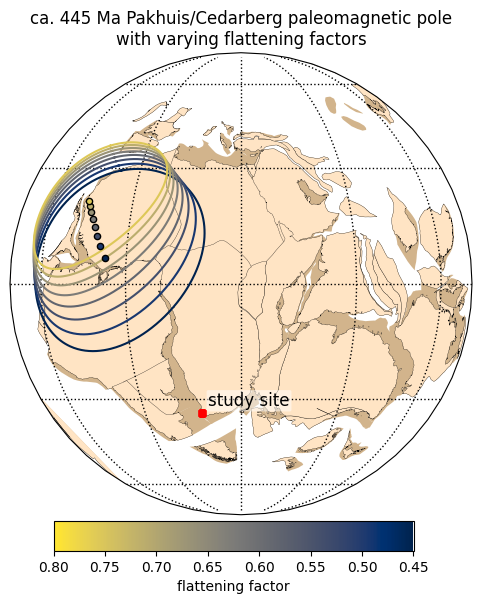

In [12]:
Pakhuis_A95 = 18

min_f = 0.40
max_f = 0.80
f_step = 0.05

cNorm  = mcolors.Normalize(vmin=min_f, vmax=max_f)
f_scalarMap = cm.ScalarMappable(norm=cNorm, cmap='cividis')

map_axis, proj_plot = make_map(ccrs.Orthographic, central_longitude=30, central_latitude=0)

t = 450

ceed_land_reconstruction = output_folder + '/land.shp'
pygplates.reconstruct(ceed_land_path, rot_path, ceed_land_reconstruction, t, 701)
paleogeo_land = gpd.read_file(ceed_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

ceed_poly_reconstruction = output_folder + '/poly.shp'
pygplates.reconstruct(ceed_poly_path, rot_path, ceed_poly_reconstruction, t, 701)
paleogeo_poly = gpd.read_file(ceed_poly_reconstruction)
paleogeo_poly = paleogeo_poly.to_crs(proj_plot)

paleogeo_poly.plot(ax=map_axis, edgecolor=None, linewidth=1, facecolor='tan')
paleogeo_land.plot(ax=map_axis, edgecolor='k', linewidth=0.2, facecolor='bisque')

plon_list = []
plat_list = []
f_list = []
dp_list = []
dm_list = []
color_list = []

for f in np.arange(min_f, max_f, f_step):
    rgba = f_scalarMap.to_rgba(f)
    hex_color = mcolors.rgb2hex(rgba)
    unsquish_inc = ipmag.unsquish(-37, f)
    unsquish_VGP = pmag.dia_vgp(Pakhuis_dec, unsquish_inc, Pakhuis_alpha95, Pakhuis_lat, Pakhuis_lon)
    ipmag.plot_pole_dp_dm(map_axis, unsquish_VGP[0]-180, -unsquish_VGP[1],
                          Pakhuis_lon, Pakhuis_lat, unsquish_VGP[2], unsquish_VGP[3],
                          pole_color=hex_color, legend=False, transform=ccrs.Geodetic())
    plon_list.append(unsquish_VGP[0]+180)
    plat_list.append(-unsquish_VGP[1])
    f_list.append(f)
    dp_list.append(unsquish_VGP[2])
    dm_list.append(unsquish_VGP[3])
    color_list.append(hex_color)
    
# Find the index where f_list is 0.6
index_0_6 = f_list.index(0.6)
# Extract the corresponding plon and plat
Pakhus_plon_0_6 = plon_list[index_0_6]
Pakhus_plat_0_6 = plat_list[index_0_6]
Pakhus_dp_0_6 = dp_list[index_0_6]
Pakhus_dm_0_6 = dm_list[index_0_6]
Pakhus_color_0_6 = color_list[index_0_6]

# Find the index where f_list is 0.5
index_0_5 = f_list.index(0.5)
# Extract the corresponding plon and plat
Pakhus_plon_0_5 = plon_list[index_0_5]
Pakhus_plat_0_5 = plat_list[index_0_5]
Pakhus_dp_0_5 = dp_list[index_0_5]
Pakhus_dm_0_5 = dm_list[index_0_5]
Pakhus_color_0_5 = color_list[index_0_5]

# Find the index where f_list is 0.45
index_0_45 = f_list.index(0.45)
# Extract the corresponding plon and plat
Pakhus_plon_0_45 = plon_list[index_0_45]
Pakhus_plat_0_45 = plat_list[index_0_45]
Pakhus_dp_0_45 = dp_list[index_0_45]
Pakhus_dm_0_45 = dm_list[index_0_45]
Pakhus_color_0_45 = color_list[index_0_45]
    
map_axis.set_title('ca. 445 Ma Pakhuis/Cedarberg paleomagnetic pole\nwith varying flattening factors')

map_axis.text(Pakhuis_lon+2, Pakhuis_lat+2, 'study site', transform=ccrs.Geodetic(), fontproperties=FontProperties(family='sans', size=12), 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))

sm = plt.cm.ScalarMappable(cmap=cm.cividis, norm=plt.Normalize(vmin=min_f+0.05, vmax=max_f))
sm._A = []
cbar_ax = plt.gcf().add_axes([0.2, 0.05, 0.6, 0.05])
cbar = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal', label='flattening factor')
cbar.ax.invert_xaxis()
plt.savefig('../Figures/Gondwana_Pakhuis_shallowed_poles.pdf', bbox_inches='tight')
plt.show()

### Plot Torsvik et al. (2012) spline

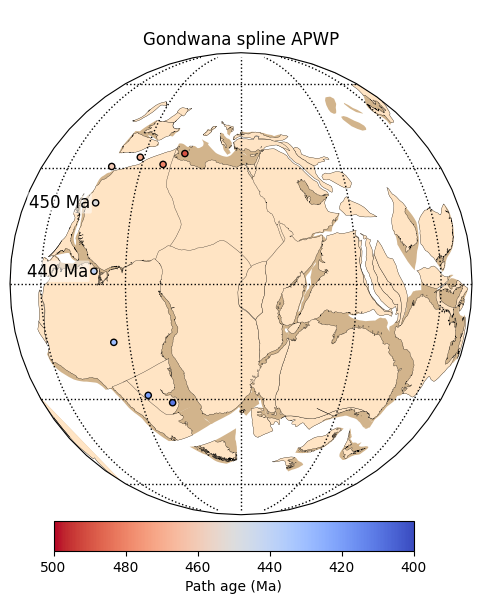

In [13]:
spline_plons = Torsvik_Gondwana_APWP['spline_plon'].tolist()
spline_plats = Torsvik_Gondwana_APWP['spline_plat'].tolist()
spline_GCD = Torsvik_Gondwana_APWP['GCD'].tolist()
spline_ages = Torsvik_Gondwana_APWP['age'].tolist()
spline_0_1 = [0.1 for _ in range(len(Torsvik_Gondwana_APWP))]

map_axis, proj_plot = make_map(ccrs.Orthographic, central_longitude=30, central_latitude=0)

t = 450

ceed_land_reconstruction = output_folder + '/land.shp'
pygplates.reconstruct(ceed_land_path, rot_path, ceed_land_reconstruction, t, 701)
paleogeo_land = gpd.read_file(ceed_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

ceed_poly_reconstruction = output_folder + '/poly.shp'
pygplates.reconstruct(ceed_poly_path, rot_path, ceed_poly_reconstruction, t, 701)
paleogeo_poly = gpd.read_file(ceed_poly_reconstruction)
paleogeo_poly = paleogeo_poly.to_crs(proj_plot)

paleogeo_poly.plot(ax=map_axis, edgecolor=None, linewidth=1, facecolor='tan')
paleogeo_land.plot(ax=map_axis, edgecolor='k', linewidth=0.2, facecolor='bisque')

ipmag.plot_poles_colorbar(map_axis, spline_plons, spline_plats, spline_0_1, spline_ages, age_range_min, age_range_max,
                        colormap='coolwarm', colorbar=False)
map_axis.set_title(' \nGondwana spline APWP')

index_450 = spline_ages.index(450)
spline_plon_450 = spline_plons[index_450]
spline_plat_450 = spline_plats[index_450]
map_axis.text(spline_plon_450-2, spline_plat_450, '450 Ma', transform=ccrs.Geodetic(), 
              fontproperties=FontProperties(family='sans', size=12), 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"),
              horizontalalignment='right', verticalalignment='center')

index_440 = spline_ages.index(440)
spline_plon_440 = spline_plons[index_440]
spline_plat_440 = spline_plats[index_440]
map_axis.text(spline_plon_440-2, spline_plat_440, '440 Ma', transform=ccrs.Geodetic(), 
              fontproperties=FontProperties(family='sans', size=12), 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"),
              horizontalalignment='right', verticalalignment='center')

sm = plt.cm.ScalarMappable(cmap=cm.coolwarm, norm=plt.Normalize(vmin=age_range_min, vmax=age_range_max))
sm._A = []
cbar_ax = plt.gcf().add_axes([0.2, 0.05, 0.6, 0.05])
cbar = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal', label='Path age (Ma)')
cbar.ax.invert_xaxis()
plt.savefig('../Figures/Gondwana_recon_spline.pdf', bbox_inches='tight')
plt.show()

### Plot Torsvik et al. (2012) running mean

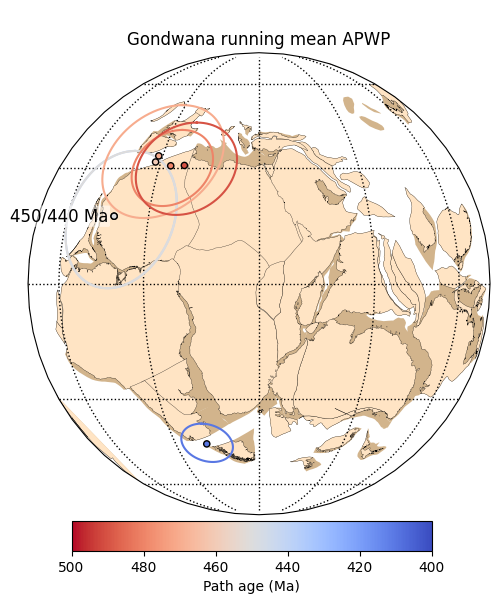

In [14]:
RM_plons = Torsvik_Gondwana_RM_filtered['RM_0.6_plon'].tolist()
RM_plats = Torsvik_Gondwana_RM_filtered['RM_0.6_plat'].tolist()
RM_A95s = Torsvik_Gondwana_RM_filtered['RM_0.6_a95'].tolist()
RM_ages = Torsvik_Gondwana_RM_filtered['age'].tolist()

map_axis, proj_plot = make_map(ccrs.Orthographic, central_longitude=30, central_latitude=0)

t = 450

ceed_land_reconstruction = output_folder + '/land.shp'
pygplates.reconstruct(ceed_land_path, rot_path, ceed_land_reconstruction, t, 701)
paleogeo_land = gpd.read_file(ceed_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

ceed_poly_reconstruction = output_folder + '/poly.shp'
pygplates.reconstruct(ceed_poly_path, rot_path, ceed_poly_reconstruction, t, 701)
paleogeo_poly = gpd.read_file(ceed_poly_reconstruction)
paleogeo_poly = paleogeo_poly.to_crs(proj_plot)

paleogeo_poly.plot(ax=map_axis, edgecolor=None, linewidth=1, facecolor='tan')
paleogeo_land.plot(ax=map_axis, edgecolor='k', linewidth=0.2, facecolor='bisque')

ipmag.plot_poles_colorbar(map_axis, RM_plons, RM_plats, RM_A95s, RM_ages, age_range_min, age_range_max,
                        colormap='coolwarm', colorbar=False)
map_axis.set_title(' \nGondwana running mean APWP')

index_450 = RM_ages.index(450)
plon_450 = RM_plons[index_450]
plat_450 = RM_plats[index_450]
map_axis.text(plon_450-2, plat_450, '450/440 Ma', transform=ccrs.Geodetic(), 
              fontproperties=FontProperties(family='sans', size=12), 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"),
              horizontalalignment='right', verticalalignment='center')

sm = plt.cm.ScalarMappable(cmap=cm.coolwarm, norm=plt.Normalize(vmin=age_range_min, vmax=age_range_max))
sm._A = []
cbar_ax = plt.gcf().add_axes([0.2, 0.05, 0.6, 0.05])
cbar = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal', label='Path age (Ma)')
cbar.ax.invert_xaxis()
plt.savefig('../Figures/Gondwana_recon_RM.pdf', bbox_inches='tight')
plt.show()

## Plot basins and highlands

### Add basins and highlands

We have a shapefile with basins proximal to Ordovician ice sheets. Within that file there is an IceContact field that has the codes:
- M for marginal glaciomarine
- G for grounded ice contact
- U for unconformity

Let's specify the path to this file and assign colors through a color dictionary that will be used after files have been reconstructed and imported to GeoPandas.

We will also import a shapefile that corresponds to regions that can be interpreted to have been highlands following the assembly of Gondwana.

In [1]:
land_color = 'wheat'
water_color = '#f0f8ff'

basins_path = '../data/paleogeography/features/Hirnantian_Glacial_Basins.shp'
glaciomarine_color = '#1f78b4'
grounded_ice_color = '#a6cee3' 
unconformity_color = '#c3c1c1'
basin_colors = {'M': glaciomarine_color, 'G': grounded_ice_color, 'U': unconformity_color}

highlands_path = '../data/paleogeography/features/Gondwana_highlands.shp'
highlands_color = 'tan'

arcs_path = '../data/paleogeography/features/OrdovicianArcs.shp'
arcs_color = '#e38074'

sutures_path = '../data/paleogeography/features/OrdovicianSutures.shp'
sutures_color = '#808000'

ophiolites_path = '../data/paleogeography/features/Ordovician_ophiolites.shp'
ophiolites_color = '#B4C424'

small_ice_path = '../data/paleogeography/features/ice_sheet_small.shp'
large_ice_path = '../data/paleogeography/features/ice_sheet_max.shp'
ice_sheet_color = '#E0FFFF'

lat_grid=[-80,-60,-40,-20,0]

In [2]:
map_axis, proj_plot = make_map(ccrs.Orthographic, central_longitude=30, central_latitude=0)

t = 445
anchored_plate = 701

ceed_modified_land_reconstruction = output_folder + '/land-modified.shp'
pygplates.reconstruct(ceed_modified_land_path, modified_rot_path, ceed_modified_land_reconstruction, t, anchored_plate)
paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

basins_reconstruction = output_folder + '/basins.shp'
pygplates.reconstruct(basins_path, modified_rot_path, basins_reconstruction, t, anchored_plate)
basins = gpd.read_file(basins_reconstruction)
basins = basins.to_crs(proj_plot)
basins['color'] = basins['IceContact'].map(basin_colors)

highlands_reconstruction = output_folder + '/highlands.shp'
pygplates.reconstruct(highlands_path, modified_rot_path, highlands_reconstruction, t, anchored_plate)
highlands = gpd.read_file(highlands_reconstruction)
highlands = highlands.to_crs(proj_plot)

paleogeo_land.plot(ax=map_axis, edgecolor='k', linewidth=0.2, facecolor='bisque')
highlands.plot(ax=map_axis, linewidth=1, color=highlands_color, edgecolor=None)
basins.plot(ax=map_axis, linewidth=1, color=basins['color'], edgecolor=None)

plt.show()

def clean_geometries(gdf):
    gdf = gdf[gdf.is_valid]
    gdf = gdf.dropna(subset=['geometry'])
    return gdf

paleogeo_land = clean_geometries(paleogeo_land)

paleogeo_land.to_file(output_folder + '/Gondwana_land_701.shp')
basins.to_file(output_folder + '/Gondwana_basins_701.shp')
highlands.to_file(output_folder + '/Gondwana_highlands_701.shp')

NameError: name 'make_map' is not defined

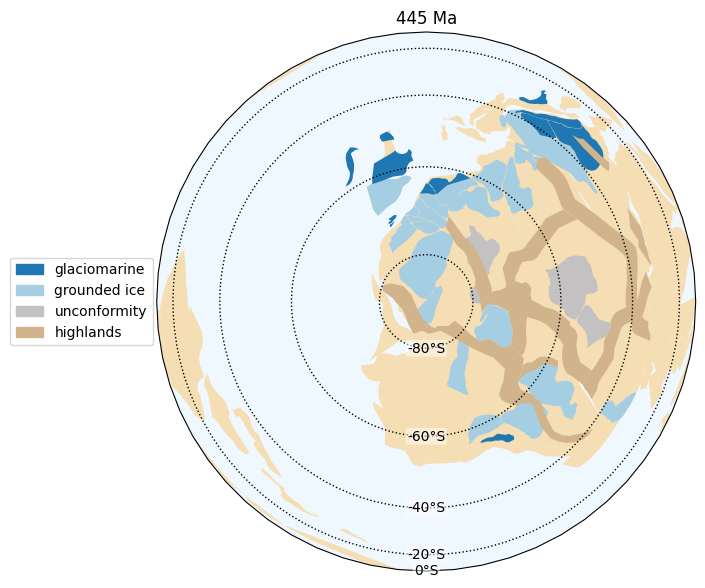

In [17]:
plot_highlands = True

map_axis, proj_plot = make_map(ccrs.Orthographic, central_latitude=-90,lat_grid=lat_grid,lon_grid=[],figsize=(7, 7))
t = 445

ceed_modified_land_reconstruction = output_folder + '/land-modified-' + str(t) + '.shp'
pygplates.reconstruct(ceed_modified_land_path, modified_rot_path, ceed_modified_land_reconstruction, t, 1)
paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

basins_reconstruction = output_folder + '/basins.shp'
pygplates.reconstruct(basins_path, modified_rot_path, basins_reconstruction, t, 1)
basins = gpd.read_file(basins_reconstruction)
basins = basins.to_crs(proj_plot)
basins['color'] = basins['IceContact'].map(basin_colors)

highlands_reconstruction = output_folder + '/highlands.shp'
pygplates.reconstruct(highlands_path, modified_rot_path, highlands_reconstruction, t, 1)
highlands = gpd.read_file(highlands_reconstruction)
highlands = highlands.to_crs(proj_plot)

paleogeo_land.plot(ax=map_axis, linewidth=1, facecolor=land_color, edgecolor=None)

basins.plot(ax=map_axis, linewidth=1, color=basins['color'], edgecolor=None)

# Create a Patch object for each basin type
patch1 = mpatches.Patch(color=glaciomarine_color, label='glaciomarine')
patch2 = mpatches.Patch(color=grounded_ice_color, label='grounded ice')
patch3 = mpatches.Patch(color=unconformity_color, label='unconformity')
patch4 = mpatches.Patch(color=highlands_color, label='highlands')

if plot_highlands:
    highlands.plot(ax=map_axis, linewidth=1, color=highlands_color, edgecolor=None)
    map_axis.legend(handles=[patch1, patch2, patch3, patch4], loc='center', bbox_to_anchor=(-0.14, 0.5))
else:
    map_axis.legend(handles=[patch1, patch2, patch3], loc='center', bbox_to_anchor=(-0.14, 0.5))

map_axis.set_facecolor('#f0f8ff')

for lat in lat_grid:
    map_axis.text(180, lat, f'{lat}°S', transform=ccrs.Geodetic(), 
                  horizontalalignment='center', verticalalignment='center',
                  bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))

map_axis.set_title(f'{t} Ma')

plt.show()

## Gondwana reconstruction with pole and basin

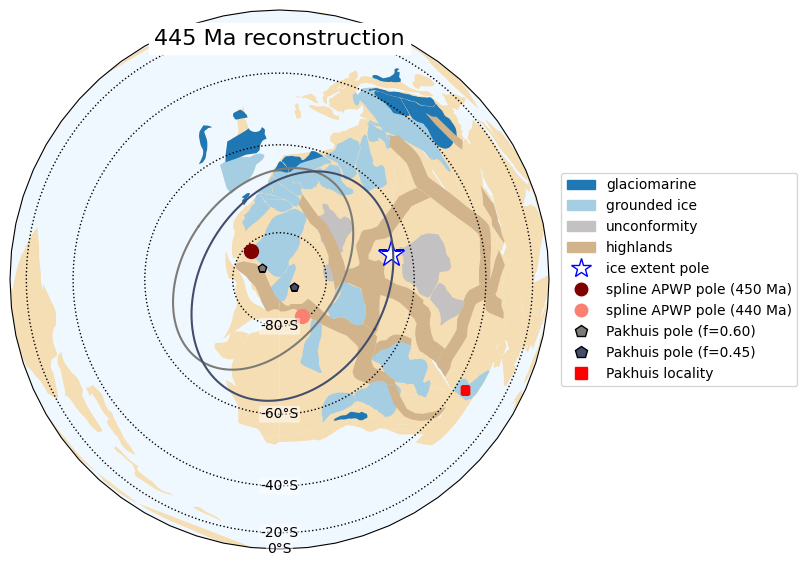

In [18]:
def recon_pole(pole_lon, pole_lat, plate_id=701, t=445,
               rot_path=modified_rot_path, anchor_plate_id=1):
    pole = pygplates.PointOnSphere(pole_lat, pole_lon)
    pole_feature = pygplates.Feature()
    pole_feature.set_geometry(pole)
    pole_feature.set_reconstruction_plate_id(plate_id)
    reconstructed_features = []
    pygplates.reconstruct(pole_feature, rot_path, 
                          reconstructed_features, t, anchor_plate_id)  # t is the reconstruction time
    reconstructed_pole = reconstructed_features[0].get_reconstructed_geometry()
    pole_lat_recon, pole_lon_recon = reconstructed_pole.to_lat_lon()
    return pole_lon_recon, pole_lat_recon

ice_pole_lon = 14
ice_pole_lat = 4

ice_pole_lon_recon, ice_pole_lat_recon = recon_pole(ice_pole_lon, ice_pole_lat, plate_id=701, t=445,
                                                    rot_path=modified_rot_path)

spline_plon_450_recon, spline_plat_450_recon = recon_pole(spline_plon_450, spline_plat_450, plate_id=701, t=445,
                                                            rot_path=modified_rot_path)

spline_plon_440_recon, spline_plat_440_recon = recon_pole(spline_plon_440, spline_plat_440, plate_id=701, t=445,
                                                            rot_path=modified_rot_path)

Pakhus_plon_0_6_recon, Pakhus_plat_0_6_recon = recon_pole(Pakhus_plon_0_6, Pakhus_plat_0_6, plate_id=701, t=445,
                                                            rot_path=modified_rot_path)

Pakhus_plon_0_5_recon, Pakhus_plat_0_5_recon = recon_pole(Pakhus_plon_0_5, Pakhus_plat_0_5, plate_id=701, t=445,
                                                            rot_path=modified_rot_path)

Pakhus_plon_0_45_recon, Pakhus_plat_0_45_recon = recon_pole(Pakhus_plon_0_45, Pakhus_plat_0_45, plate_id=701, t=445,
                                                            rot_path=modified_rot_path)

Pakhus_locality_lon_recon, Pakhus_locality_lat_recon = recon_pole(Pakhuis_lon, Pakhuis_lat, plate_id=701, t=445,
                                                                  rot_path=modified_rot_path)

plot_highlands = True

map_axis, proj_plot = make_map(ccrs.Orthographic, central_latitude=-90,lat_grid=lat_grid,lon_grid=[],figsize=(7, 7))
t = 445

ceed_modified_land_reconstruction = output_folder + '/land-modified-' + str(t) + '.shp'
pygplates.reconstruct(ceed_modified_land_path, modified_rot_path, ceed_modified_land_reconstruction, t, 1)
paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

basins_reconstruction = output_folder + '/basins.shp'
pygplates.reconstruct(basins_path, modified_rot_path, basins_reconstruction, t, 1)
basins = gpd.read_file(basins_reconstruction)
basins = basins.to_crs(proj_plot)
basins['color'] = basins['IceContact'].map(basin_colors)

highlands_reconstruction = output_folder + '/highlands.shp'
pygplates.reconstruct(highlands_path, modified_rot_path, highlands_reconstruction, t, 1)
highlands = gpd.read_file(highlands_reconstruction)
highlands = highlands.to_crs(proj_plot)

paleogeo_land.plot(ax=map_axis, linewidth=1, facecolor=land_color, edgecolor=None)

basins.plot(ax=map_axis, linewidth=1, color=basins['color'], edgecolor=None)

map_axis.plot(ice_pole_lon_recon, ice_pole_lat_recon, markeredgecolor='blue', markerfacecolor='white', marker='*', markersize=20, transform=ccrs.Geodetic())
map_axis.plot(spline_plon_450_recon, spline_plat_450_recon, color='maroon', marker='o', markersize=10, transform=ccrs.Geodetic())
map_axis.plot(spline_plon_440_recon, spline_plat_440_recon, color='salmon', marker='o', markersize=10, transform=ccrs.Geodetic())
ipmag.plot_pole_dp_dm(map_axis, Pakhus_plon_0_6_recon, Pakhus_plat_0_6_recon,
                        Pakhus_locality_lon_recon, Pakhus_locality_lat_recon, Pakhus_dp_0_6, Pakhus_dm_0_6,
                        pole_marker='p', markersize=40,
                        pole_color=Pakhus_color_0_6, legend=False, transform=ccrs.Geodetic())
# ipmag.plot_pole_dp_dm(map_axis, Pakhus_plon_0_5_recon, Pakhus_plat_0_5_recon,
#                         Pakhus_locality_lon_recon, Pakhus_locality_lat_recon, Pakhus_dp_0_5, Pakhus_dm_0_5,
#                         pole_marker='p', markersize=40,
#                         pole_color=Pakhus_color_0_5, legend=False, transform=ccrs.Geodetic())
ipmag.plot_pole_dp_dm(map_axis, Pakhus_plon_0_45_recon, Pakhus_plat_0_45_recon,
                        Pakhus_locality_lon_recon, Pakhus_locality_lat_recon, Pakhus_dp_0_45, Pakhus_dm_0_45,
                        pole_marker='p', markersize=40,
                        pole_color=Pakhus_color_0_5, legend=False, transform=ccrs.Geodetic())

patch1 = mpatches.Patch(color=glaciomarine_color, label='glaciomarine')
patch2 = mpatches.Patch(color=grounded_ice_color, label='grounded ice')
patch3 = mpatches.Patch(color=unconformity_color, label='unconformity')
patch4 = mpatches.Patch(color=highlands_color, label='highlands')
ice_pole_symbol = mlines.Line2D([], [], markeredgecolor='blue', markerfacecolor='white', marker='*', linestyle='None',
                              markersize=15, label='ice extent pole')
spline_450_pole_symbol = mlines.Line2D([], [], color='maroon', marker='o', linestyle='None',
                              markersize=9, label='spline APWP pole (450 Ma)')
spline_440_pole_symbol = mlines.Line2D([], [], color='salmon', marker='o', linestyle='None',
                              markersize=9, label='spline APWP pole (440 Ma)')
Pakhuis_0_6_pole_symbol = mlines.Line2D([], [], markeredgecolor='black', markerfacecolor=Pakhus_color_0_6, marker='p', linestyle='None',
                              markersize=9, label='Pakhuis pole (f=0.60)')
Pakhuis_0_5_pole_symbol = mlines.Line2D([], [], markeredgecolor='black', markerfacecolor=Pakhus_color_0_5, marker='p', linestyle='None',
                              markersize=9, label='Pakhuis pole (f=0.45)')
Pakhuis_locality = mlines.Line2D([], [], color='red', marker='s', linestyle='None',
                              markersize=9, label='Pakhuis locality')

highlands.plot(ax=map_axis, linewidth=1, color=highlands_color, edgecolor=None)
map_axis.legend(handles=[patch1, patch2, patch3, patch4, ice_pole_symbol, spline_450_pole_symbol, spline_440_pole_symbol, Pakhuis_0_6_pole_symbol, Pakhuis_0_5_pole_symbol, Pakhuis_locality], loc='center left', bbox_to_anchor=(1.01, 0.5))

map_axis.set_facecolor('#f0f8ff')

for lat in lat_grid:
    map_axis.text(180, lat, f'{lat}°S', transform=ccrs.Geodetic(), 
                  horizontalalignment='center', verticalalignment='center',
                  bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))

map_axis.set_title(f'{t} Ma reconstruction', fontsize=16, y=0.95, backgroundcolor='white', va='top')
plt.savefig('../Figures/Gondwana_ice_data.pdf', bbox_inches='tight', transparent=True)
plt.show()

## Smaller ice sheet scenario

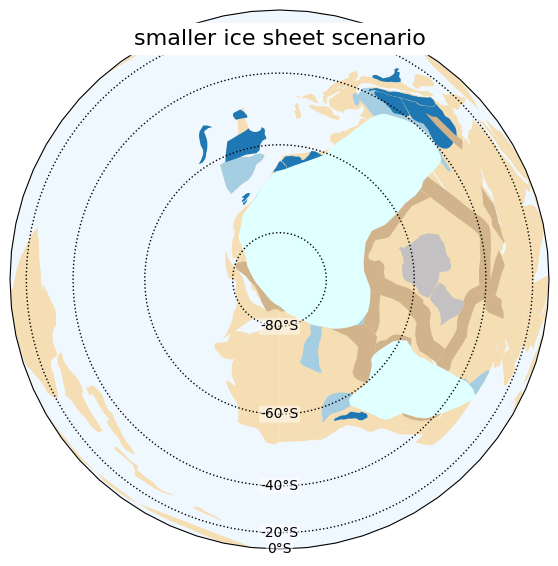

In [19]:
map_axis, proj_plot = make_map(ccrs.Orthographic, central_latitude=-90,lat_grid=lat_grid,lon_grid=[],figsize=(7, 7))
t = 445

ceed_modified_land_reconstruction = output_folder + '/land-modified-' + str(t) + '.shp'
pygplates.reconstruct(ceed_modified_land_path, modified_rot_path, ceed_modified_land_reconstruction, t, 1)
paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

basins_reconstruction = output_folder + '/basins.shp'
pygplates.reconstruct(basins_path, modified_rot_path, basins_reconstruction, t, 1)
basins = gpd.read_file(basins_reconstruction)
basins = basins.to_crs(proj_plot)
basins['color'] = basins['IceContact'].map(basin_colors)

small_ice_reconstruction = output_folder + '/ice_sheet_small.shp'
pygplates.reconstruct(small_ice_path, modified_rot_path, small_ice_reconstruction, t, 1)
small_ice_sheets = gpd.read_file(small_ice_reconstruction)
small_ice_sheets = small_ice_sheets.to_crs(proj_plot)

highlands_reconstruction = output_folder + '/highlands.shp'
pygplates.reconstruct(highlands_path, modified_rot_path, highlands_reconstruction, t, 1)
highlands = gpd.read_file(highlands_reconstruction)
highlands = highlands.to_crs(proj_plot)

paleogeo_land.plot(ax=map_axis, linewidth=1, facecolor=land_color, edgecolor=None)
basins.plot(ax=map_axis, linewidth=1, color=basins['color'], edgecolor=None)

# Create a Patch object for each basin type
patch1 = mpatches.Patch(color=glaciomarine_color, label='glaciomarine')
patch2 = mpatches.Patch(color=grounded_ice_color, label='grounded ice')
patch3 = mpatches.Patch(color=unconformity_color, label='unconformity')
patch4 = mpatches.Patch(color=highlands_color, label='highlands')
patch5 = mpatches.Patch(color=ice_sheet_color, label='ice sheet')

highlands.plot(ax=map_axis, linewidth=1, color=highlands_color, edgecolor=None)
small_ice_sheets.plot(ax=map_axis, linewidth=1, color=ice_sheet_color, edgecolor=None)

# legend = map_axis.legend(handles=[patch1, patch2, patch3, patch4, patch5], loc='center left', bbox_to_anchor=(-0.05, 0.5))
# legend.get_frame().set_facecolor('white')
# legend.get_frame().set_alpha(1)

map_axis.set_facecolor('#f0f8ff')

for lat in lat_grid:
    map_axis.text(180, lat, f'{lat}°S', transform=ccrs.Geodetic(), 
                  horizontalalignment='center', verticalalignment='center',
                  bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))

map_axis.set_title('smaller ice sheet scenario', fontsize=16, y=0.95, backgroundcolor='white', va='top')
plt.savefig('../Figures/Gondwana_ice_small.pdf', bbox_inches='tight', transparent=True)
plt.show()

## Larger ice sheet scenario

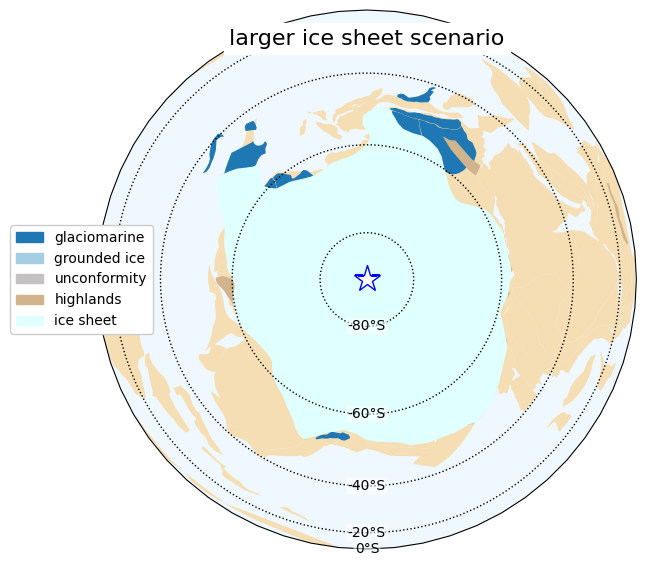

In [20]:
map_axis, proj_plot = make_map(ccrs.Orthographic, central_latitude=-90,lat_grid=lat_grid,lon_grid=[],figsize=(7, 7))
t = 445

ceed_modified_land_reconstruction = output_folder + '/land-modified_ice_centroid' + str(t) + '.shp'
pygplates.reconstruct(ceed_modified_land_path, modified_rot_path_ice_centroid, ceed_modified_land_reconstruction, t, 1)
paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

basins_reconstruction = output_folder + '/basins_ice_centroid.shp'
pygplates.reconstruct(basins_path, modified_rot_path_ice_centroid, basins_reconstruction, t, 1)
basins = gpd.read_file(basins_reconstruction)
basins = basins.to_crs(proj_plot)
basins['color'] = basins['IceContact'].map(basin_colors)

large_ice_reconstruction = output_folder + '/ice_sheet_large_ice_centroid.shp'
pygplates.reconstruct(large_ice_path, modified_rot_path_ice_centroid, large_ice_reconstruction, t, 1)
large_ice_sheets = gpd.read_file(large_ice_reconstruction)
large_ice_sheets = large_ice_sheets.to_crs(proj_plot)

highlands_reconstruction = output_folder + '/highlands_ice_centroid.shp'
pygplates.reconstruct(highlands_path, modified_rot_path_ice_centroid, highlands_reconstruction, t, 1)
highlands = gpd.read_file(highlands_reconstruction)
highlands = highlands.to_crs(proj_plot)

paleogeo_land.plot(ax=map_axis, linewidth=1, facecolor=land_color, edgecolor=None)
basins.plot(ax=map_axis, linewidth=1, color=basins['color'], edgecolor=None)

map_axis.plot(0, -90, markeredgecolor='blue', markerfacecolor='white', marker='*', markersize=20, transform=ccrs.Geodetic())

# Create a Patch object for each basin type
patch1 = mpatches.Patch(color=glaciomarine_color, label='glaciomarine')
patch2 = mpatches.Patch(color=grounded_ice_color, label='grounded ice')
patch3 = mpatches.Patch(color=unconformity_color, label='unconformity')
patch4 = mpatches.Patch(color=highlands_color, label='highlands')
patch5 = mpatches.Patch(color=ice_sheet_color, label='ice sheet')

highlands.plot(ax=map_axis, linewidth=1, color=highlands_color, edgecolor=None)
large_ice_sheets.plot(ax=map_axis, linewidth=1, color=ice_sheet_color, edgecolor=None)

legend = map_axis.legend(handles=[patch1, patch2, patch3, patch4, patch5], loc='center left', bbox_to_anchor=(-0.175, 0.5))
legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(1)

map_axis.set_facecolor('#f0f8ff')

for lat in lat_grid:
    map_axis.text(180, lat, f'{lat}°S', transform=ccrs.Geodetic(), 
                  horizontalalignment='center', verticalalignment='center',
                  bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))

map_axis.set_title('larger ice sheet scenario', fontsize=16, y=0.95, backgroundcolor='white', va='top')
plt.savefig('../Figures/Gondwana_ice_large.pdf', bbox_inches='tight', transparent=True)
plt.show()

## Ice sheet area calculations

Using QGIS, we can calculate the areas for ```'../data/paleogeography/features/ice_sheet_max.shp'``` and ```'../data/paleogeography/features/ice_sheet_small.shp'```


In [54]:
large_area_km2_QGIS = 42199682.663
print(f'Larger ice sheet area: {large_area_km2_QGIS:.2e} km^2')

Larger ice sheet area: 4.22e+07 km^2


In [55]:
small_area_km2_QGIS = 4405001.792 + 15127017.668
print(f'Smaller ice sheet area: {small_area_km2_QGIS:.2e} km^2')

Smaller ice sheet area: 1.95e+07 km^2


In [25]:
Velichko_LGM_area_km2 = 36581800
Velichko_LGM_area_m2 = Velichko_LGM_area_km2 * 1e6
print(f'Velichko ice sheet area: {Velichko_LGM_area_km2:.2e} km^2')

Velichko ice sheet area: 3.66e+07 km^2


In [26]:
Antarctica_area_modern_km2 = 14 * 1e6
Greenland_area_modern_km2 = 1.7 * 1e6
modern_ice_area_km2 = Antarctica_area_modern_km2 + Greenland_area_modern_km2
print(f'modern ice sheet area: {modern_ice_area_km2:.2e} km^2')

modern ice sheet area: 1.57e+07 km^2
